In [3]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

In [1]:
from scipy.stats import binom, beta

In [4]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


Text(0, 0.5, 'p(theta)')

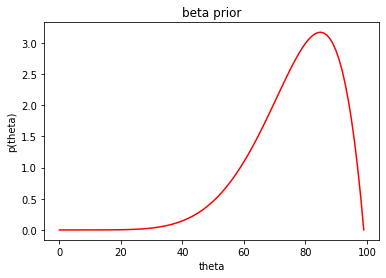

In [5]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

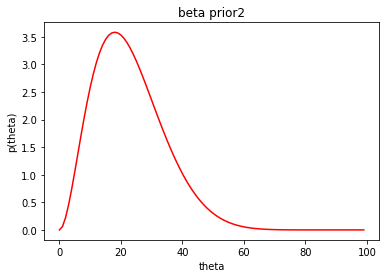

In [6]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 0.0005)

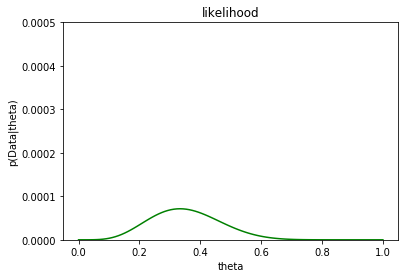

In [7]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

Text(0, 0.5, 'p(theta)')

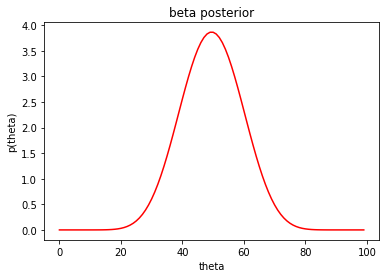

In [8]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 4)

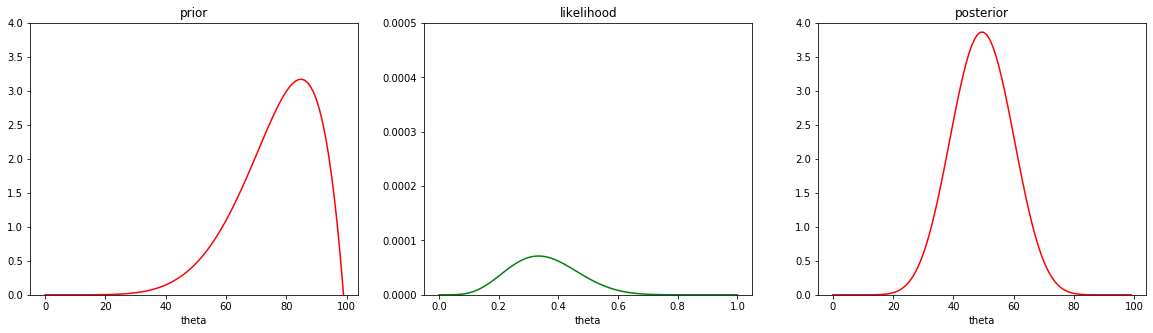

In [9]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

In [2]:
#case1 beta binomial
from scipy.stats import binom, beta

In [3]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


Text(0, 0.5, 'p(theta)')

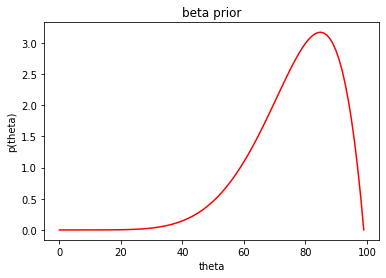

In [4]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

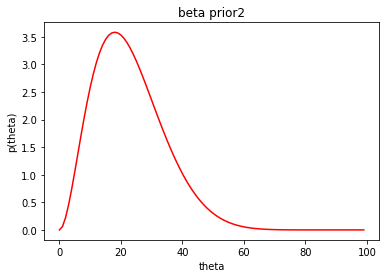

In [5]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 0.0005)

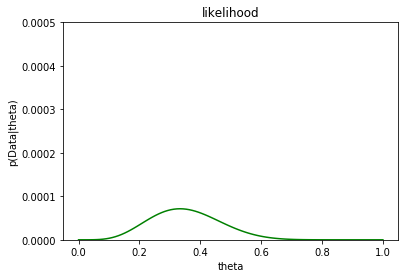

In [6]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

Text(0, 0.5, 'p(theta)')

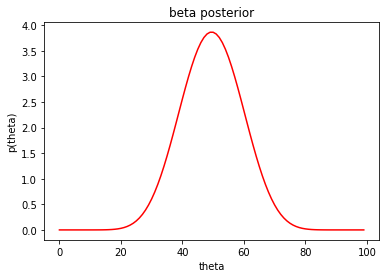

In [7]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 4)

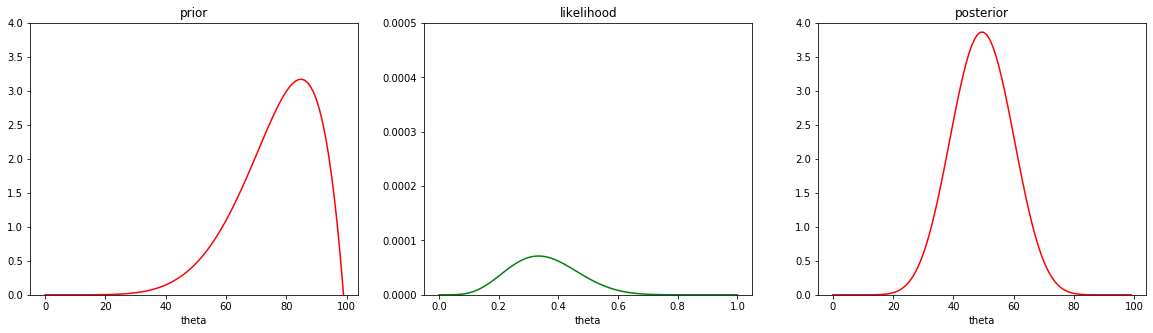

In [10]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

(HW) Case 2: Gamma-Gaussian (unknown mu)

In [9]:
from scipy.stats import norm

In [54]:
mu=10 ; sigma=1 #setting parameter
N=100
np.random.seed(101)
data=norm.rvs(mu,sigma,size=N)
print(data)
print(np.mean(data))
print(np.std(data))
xbar = np.mean(data); sam = 1/np.std(data)

[12.707 10.628 10.908 10.504 10.651  9.681  9.152 10.606  7.982 10.74
 10.529  9.411 10.189  9.241  9.067 10.955 10.191 11.979 12.606 10.684
 10.303 11.694  8.294  8.841  9.865 10.391 10.167 10.185 10.808 10.073
 10.639 10.33   9.503  9.246  9.057 10.485  9.883 11.902 10.238 11.997
  9.007 10.197  8.863 10.    11.026  9.843  9.968 10.65  12.155  9.39
  9.245  9.654 10.147  9.521 10.559 11.025  9.074 11.863  8.866 10.61
 10.386 12.084  9.623 10.23  10.681 11.035  9.969 11.94   8.995  9.258
 10.187  9.267  8.617 11.482 10.961  7.859 10.993 11.192  8.953 11.293
  8.532  9.506  9.837 10.486 10.392 10.221  9.145 11.542 10.666  9.462
  9.431 11.407 10.642  9.095  9.609 11.028  8.027  9.133 10.721  8.777]
10.166369880423112
1.0338189430873386


Text(0, 0.5, 'p(theta)')

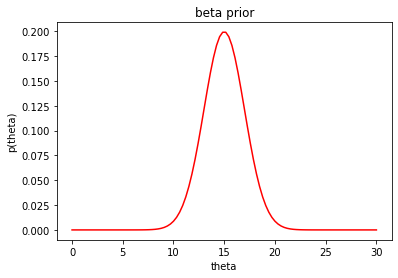

In [58]:
#choose your belief parameter
a=15 ; b=0.5
prior=norm(loc=a,scale=1/b)
theta=np.linspace(0,30,100)
plt.plot(theta,prior.pdf(theta),color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'log_p(Data|mu)')

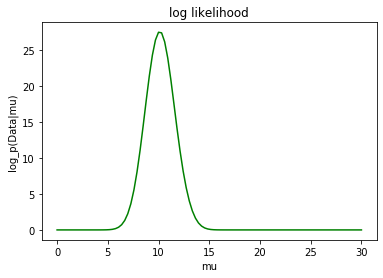

In [51]:
def likelihood(x,mu):
    l=0
    for i in x:
        l+=norm.pdf(i,mu,1)
    return l
plt.plot(theta, likelihood(data, theta), color='g')
plt.title("log likelihood")
plt.xlabel("mu")
plt.ylabel("log_p(Data|mu)")

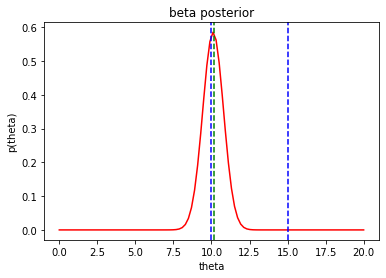

In [69]:
#mu|data
# Belief update
a_pos = b+sam
b_pos = (mu*b+xbar*sam)/a_pos
posterior = norm(loc=b_pos, scale=1/a_pos)
theta = np.linspace(0,20,100)
plt.plot(theta,posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')
plt.axvline(15, color = 'b', linestyle = '--')
plt.axvline(10, color = 'b', linestyle = '--')
plt.axvline(xbar, color = 'g', linestyle = '--')

Text(0.5, 0, 'mu')

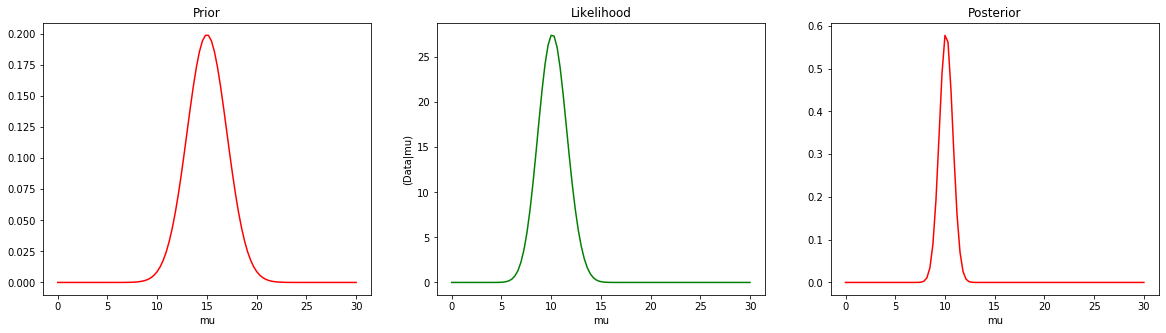

In [60]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), 'r')
ax1.set_title('Prior')
ax1.set_xlabel('mu')

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('Likelihood')
ax2.set_xlabel('mu')
ax2.set_ylabel("(Data|mu)")

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), 'r')
ax3.set_title('Posterior')
ax3.set_xlabel('mu')